# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [3]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

from panel.interact import interact

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [5]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

neighborhood_path = Path('Data/neighborhoods_coordinates.csv')
neighborhood_locations = pd.read_csv(neighborhood_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [49]:
# Define Panel Visualization Functions
def housing_units_per_year():
    housing_units_yearly = sfo_data['housing_units'].groupby(sfo_data.index).mean()
    
    # YOUR CODE HERE!
    fig_housing_units = plt.figure()
    plot_housing_units = housing_units_yearly.plot.bar()
    plot_housing_units.set_xlabel('Year')
    plot_housing_units.set_ylabel('Housing units')
    plot_housing_units.set_title('Housing Units in San Francisco from 2010 to 2016')
    plot_housing_units.set_ylim(housing_units_yearly.min() - housing_units_yearly.std(), housing_units_yearly.max() + housing_units_yearly.std())
    average_housing_pane = pn.panel(plot_housing_units)
    return average_housing_pane

def average_gross_rent():
    average_rent = sfo_data.groupby('year')[['sale_price_sqr_foot', 'gross_rent']].mean()
    average_gross = average_rent['gross_rent'].plot(title='Average Gross Rent by Year', color='r')

    average_gross.set_xlim([average_rent.index.min(), average_rent.index.max()])
    average_gross.set(xlabel = 'Year', ylabel = 'Price per sqrft')
    
    # YOUR CODE HERE!
    average_gross_pane = pn.panel(average_gross)
    return average_gross_pane
    


def average_sales_price():
    average_rent = sfo_data.groupby('year')[['sale_price_sqr_foot', 'gross_rent']].mean()
    average_sales = average_rent['sale_price_sqr_foot'].plot(title='Average Price per Sqft by Year', color='m')
    average_sales.set_xlim([average_rent.index.min(), average_rent.index.max()])
    average_sales.set(xlabel = 'Year', ylabel = 'Price per sqrft')
    
    # YOUR CODE HERE!
    average_sales_pane = pn.panel(average_sales)
    return average_sales_pane

def average_price_by_neighborhood():
    neighborhood_prices = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
    
    neighborhood_prices.hvplot(label = 'Average price per sqft',
                           x = 'year',
                           y = 'sale_price_sqr_foot',
                           ylabel= 'sale price per sqft',
                           groupby= 'neighborhood')
    
    # YOUR CODE HERE!
    neighborhood_pane = pn.panel(neighborhood_prices)
    return neighborhood_pane

def top_most_expensive_neighborhoods():
    neighborhood_prices = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
    average_neighborhood = neighborhood_prices.drop(columns='year').groupby('neighborhood').mean()
    expensive_neighborhoods = average_neighborhood.sort_values('sale_price_sqr_foot', ascending = False)
    expensive_neighborhoods.reset_index(inplace = True)
    expensive_neighborhoods_10 = expensive_neighborhoods.head(10)
    # YOUR CODE HERE!
    expensive_neighborhoods_10.hvplot.bar('neighborhood',
                                   'sale_price_sqr_foot',
                                   label='Top 10 expensive neighborhoods',
                                   xlabel = 'neighborhood',
                                   ylabel = 'average sale price per sqft',
                                   height = 400,
                                   rot = 45)
    expensive_panel = pn.panel(expensive_neighborhoods_10)
    return expensive_panel
def most_expensive_neighborhoods_rent_sales():
    neighborhood_prices = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
    average_neighborhood = neighborhood_prices.drop(columns='year').groupby('neighborhood').mean()
    expensive_neighborhoods = average_neighborhood.sort_values('sale_price_sqr_foot', ascending = False)
    expensive_neighborhoods.reset_index(inplace = True)
    expensive_neighborhoods_10 = expensive_neighborhoods.head(10)
    top_expensive = sfo_data[(sfo_data['neighborhood'].isin(expensive_neighborhoods_10['neighborhood']))]   
    
    # YOUR CODE HERE!
    stacked = top_expensive.hvplot.bar(x = 'year',
                                   y = ['sale_price_sqr_foot', 'gross_rent'],
                                   xlabel = 'year',
                                   title = ' sale price vs gross rent in top neighborhoods',
                                   rot = 45,
                                   height = 400,
                                   groupby = 'neighborhood')
    stacked_panel = pn.panel(stacked)
    return stacked_panel
    
    




def neighborhood_map():
    average_neighborhood_mean = sfo_data.groupby(by='neighborhood').mean()
    average_neighborhood_mean.reset_index(inplace=True)
    average_neighborhood_mean.rename(columns={'neighborhood': "Neighborhood"}, inplace=True)

    
    all_df = pd.merge(
    neighborhood_locations, average_neighborhood_mean, on='Neighborhood'
)
    px.set_mapbox_access_token(map_box_api)
    
    # YOUR CODE HERE!
    map = px.scatter_mapbox(all_df,
                 lat='Lat',
                 lon="Lon",
                 size='sale_price_sqr_foot',
                 color='gross_rent',
                 zoom=11,
                 hover_name='Neighborhood',
                 size_max = 15,
                 color_continuous_scale = px.colors.cyclical.IceFire
                 
)
    return map




## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Column(width=800)
    [0] Markdown(str, width=600)
    [1] Tabs
        [0] Column
            [0] Markdown(str, width=600)
            [1] Plotly(Figure)
        [1] Column
            [0] Str(AxesSubplot)
            [1] Str(AxesSubplot)
            [2] Str(AxesSubplot)
        [2] Column
            [0] DataFrame(DataFrame)
        [3] Column
            [0] DataFrame(DataFrame)

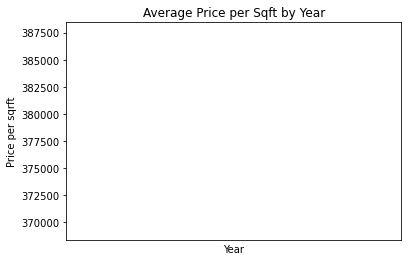

In [50]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
dashboard_title = pn.pane.Markdown("Real Estate analysis", width = 600)

# Create a tab layout for the dashboard
# YOUR CODE HERE!
tabs = pn.Tabs(
    ('Welcome', pn.Column(dashboard_title, neighborhood_map())),
    ('Rental analysis', pn.Column(housing_units_per_year(), average_gross_rent(), average_sales_price())),
    ('Rental analysis by Neighborhood', pn.Column(average_price_by_neighborhood())),
    ('Analysis of most expensive Neighborhoods', pn.Column(top_most_expensive_neighborhoods())))

panel = pn.Column(dashboard_title, tabs, width = 800)

# Create the dashboard
# YOUR CODE HERE!
panel.servable()

## Serve the Panel Dashboard

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [40]:
#housing_units_per_year()

In [41]:
#average_gross_rent()

In [42]:
#average_sales_price()

In [43]:
#average_price_by_neighborhood()

In [44]:
#top_most_expensive_neighborhoods()

In [47]:
#most_expensive_neighborhoods_rent_sales()

In [48]:
#neighborhood_map().show()